## API & SDK Work

#### API 

In [25]:
!pip install python-dotenv #install dotenv

ERROR: Invalid requirement: '#install'


In [26]:
from dotenv import load_dotenv #retrieve env values

In [27]:
import os #connect to terminal

In [28]:
load_dotenv() #true means it worked

True

In [29]:
api_key = os.getenv('QUANDL_API_KEY') #retrieve given key and store as variable

In [30]:
import requests #python library to connect to url

ticker = 'AAPL'
#request_url = "https://www.quandl.com/api/v3/datasets/WIKI/MSFT.json?api_key=" #find in API documentation
request_url = "https://www.quandl.com/api/v3/datasets/WIKI/{}.json?api_key=".format(ticker) #puts value in curly bracket
request_url = request_url + api_key
request_url


# response_data = requests.get(request_url)

'https://www.quandl.com/api/v3/datasets/WIKI/AAPL.json?api_key=__uNsgUst2sJDX4YXhxC'

In [ ]:
response_data = requests.get(request_url)
response_data.content #returns json 

In [ ]:
response_data_json = requests.get(request_url).json() #returns json file indented
response_data_json

#### SDK

In [33]:
#initial import
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
load_dotenv()

True

In [34]:
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

In [35]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [36]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-15", tz="America/New_York").isoformat()
end_date = pd.Timestamp('2021-09-20', tz="America/New_York").isoformat()
start_date = pd.Timestamp('2017-07-14', tz="America/New_York").isoformat()

In [37]:
tickers = ["FB", "TWTR", 'MSFT']
timeframe = '1D' #check alpaca documentation

In [38]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_portfolio.head()

FB                                      MSFT  \
                             open    high     low   close    volume    open   
time                                                                          
2021-04-29 00:00:00-04:00  330.17  331.81  321.61  329.51  52346724  255.50   
2021-04-30 00:00:00-04:00  326.18  329.82  324.50  325.25  22944241  249.74   
2021-05-03 00:00:00-04:00  326.17  328.55  321.84  322.60  16636436  253.39   
2021-05-04 00:00:00-04:00  320.02  322.19  313.12  318.47  21014602  250.97   
2021-05-05 00:00:00-04:00  318.17  321.06  314.49  315.02  13467994  248.98   

                                                                TWTR         \
                             high     low     close    volume   open   high   
time                                                                          
2021-04-29 00:00:00-04:00  256.10  249.00  252.4600  36861606  66.98  67.05   
2021-04-30 00:00:00-04:00  253.08  249.60  252.2700  25046626  56.04  57.63   
2021-05-03 00:00:00-04:00  254.35  251.12  251.8801  16462636  55.52  55.55   
2021-05-04 00:00:00-04:00  251.21  245.76  247.8900  25849106  55.24  55.72   
2021-05-05 00:00:00-04:00  249.50  245.82  246.5100  17888246  54.96  54.97   

                                                       
                               low    close    volume  
time                                                   
2021-04-29 00:00:00-04:00  63.9850  65.0900  21329697  
2021-04-30 00:00:00-04:00  55.0500  55.2200  81659560  
2021-05-03 00:00:00-04:00  52.6700  54.6066  75397792  
2021-05-04 00:00:00-04:00  53.1600  54.4200  27959433  
2021-05-05 00:00:00-04:00  53.3154  53.5800  16411399

In [39]:
df_closing_prices = pd.DataFrame()

In [41]:
df_closing_prices['FB'] = df_portfolio['FB']['close']
df_closing_prices['TWTR'] = df_portfolio['TWTR']['close']

In [42]:
df_closing_prices.head()

FB     TWTR
time                                      
2021-04-29 00:00:00-04:00  329.51  65.0900
2021-04-30 00:00:00-04:00  325.25  55.2200
2021-05-03 00:00:00-04:00  322.60  54.6066
2021-05-04 00:00:00-04:00  318.47  54.4200
2021-05-05 00:00:00-04:00  315.02  53.5800

In [43]:
df_closing_prices.index = df_closing_prices.index.date
df_closing_prices.head()

FB     TWTR
2021-04-29  329.51  65.0900
2021-04-30  325.25  55.2200
2021-05-03  322.60  54.6066
2021-05-04  318.47  54.4200
2021-05-05  315.02  53.5800

### Investment Value Exercise

In [118]:
portfolio = pd.DataFrame()
tickers = ['MSFT', 'AAPL']

In [119]:
portfolio['Ticker'] = ['MSFT', 'AAPL']
portfolio['Shares'] = [200, 320]

In [120]:
portfolio.index = portfolio['Ticker']

In [121]:
portfolio.head()

Ticker  Shares
Ticker               
MSFT     MSFT     200
AAPL     AAPL     320

In [122]:
portfolio.drop(columns=['Ticker'], inplace=True)

In [123]:
alpaca = tradeapi.REST(
    os.getenv('ALPACA_API_KEY'),
    os.getenv('ALPACA_SECRET_KEY'),
    api_version="v2")

In [124]:
today = pd.Timestamp("2021-09-20", tz="America/New_York").isoformat()
timeframe='1D'

prices = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
prices.index = prices.index.date

In [125]:
prices.head()

AAPL                                       MSFT                  \
              open    high     low   close     volume    open    high     low   
2021-09-20  143.86  144.84  141.27  142.97  104053339  296.33  298.72  289.52   

                              
             close    volume  
2021-09-20  294.26  30460159

In [126]:
values = []
def current_value(ticker):
    value = float(prices[ticker]['close'])*float(portfolio.loc[ticker]['Shares'])
    values.append(value)
    print(f'The value of the {ticker} stonk is:    ${value}')

In [127]:
current_value('AAPL')

The value of the AAPL stonk is:    $45750.4


In [128]:
current_value('MSFT')

The value of the MSFT stonk is:    $58852.0


In [129]:
portfolio['Value'] = values

<AxesSubplot:title={'center':'Value of Stonk Holdings'}, ylabel='Value'>

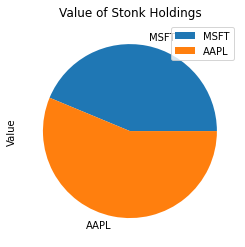

In [141]:
portfolio_values.plot.pie(y='Value', title='Value of Stonk Holdings')

<AxesSubplot:title={'center':'Value of Stonk Holdings'}, xlabel='Ticker'>

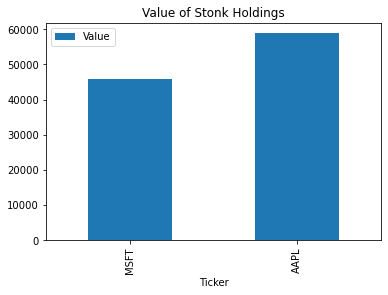

In [142]:
portfolio_values.plot.bar(y='Value', title='Value of Stonk Holdings')